# Name : *Mariam Bebawy*  
## Track : *Data Science & Business Analytics*  

### Task 8 : *Timeline Analysis - COVID-19*  
create a storyboard showing the spread of COVID-19 cases in your country or any region  
identify interesting patterns and possible reasons helping the spread of COVID-19  

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [55]:
df = pd.read_csv('./owid-covid-data.csv')
print(df.shape)
df.head()
# take a look at './owid-covid-codebook.csv' to understand the columns' context

(202186, 67)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.125,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202186 entries, 0 to 202185
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    202186 non-null  object 
 1   continent                                   190475 non-null  object 
 2   location                                    202186 non-null  object 
 3   date                                        202186 non-null  object 
 4   total_cases                                 194120 non-null  float64
 5   new_cases                                   193854 non-null  float64
 6   new_cases_smoothed                          192677 non-null  float64
 7   total_deaths                                175429 non-null  float64
 8   new_deaths                                  175389 non-null  float64
 9   new_deaths_smoothed                         174227 non-null  float64
 

In [57]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.941200e+05,1.938540e+05,1.926770e+05,1.754290e+05,175389.000000,174227.000000,193227.000000,192961.000000,191789.000000,174549.000000,174509.000000,173352.000000,151592.000000,25972.000000,25972.000000,27927.000000,27927.000000,6557.000000,6557.000000,13061.000000,13061.000000,7.938500e+04,7.540100e+04,79385.000000,75401.000000,1.039630e+05,103963.000000,95920.000000,9.405800e+04,5.586700e+04,5.326300e+04,5.075300e+04,2.760900e+04,4.578300e+04,1.121060e+05,55867.000000,53263.00000,50753.000000,27609.000000,112106.000000,1.112200e+05,111220.000000,157136.000000,2.009760e+05,180171.000000,166929.000000,165164.000000,166055.000000,165940.000000,108231.000000,166524.000000,174774.000000,125910.000000,124185.000000,81752.000000,147922.000000,189106.000000,162107.000000,6.846000e+03,6846.000000,6846.000000,6846.000000
mean,3.663026e+06,1.241284e+04,1.242450e+04,6.784729e+04,150.693219,151.522393,47578.585225,186.926068,186.804243,624.279058,1.523201,1.523697,0.969186,872.667950,22.851815,4147.786049,162.452184,441.881653,13.915405,5610.763954,99.318054,2.109361e+07,6.728391e+04,916.217758,3.239602,1.421765e+05,2.801244,0.097710,2.397003e+03,2.487703e+08,1.186713e+08,1.003454e+08,4.586427e+07,1.038944e+06,4.425367e+05,91.520546,44.09336,39.023391,21.058828,2791.732557,1.700707e+05,0.118844,51.777129,1.435036e+08,457.607953,30.646474,8.824947,5.566838,19611.707006,13.621339,260.907713,8.367498,10.661687,32.798992,50.889713,3.085479,73.635834,0.725056,4.308325e+04,9.327044,14.412781,1157.816469
std,2.300692e+07,8.679247e+04,8.493248e+04,3.521482e+05,769.221675,752.865195,87271.389751,915.147954,600.425218,912.541194,5.308215,3.487142,0.380156,2559.570747,27.186235,11138.924952,199.587681,600.423068,15.646391,13706.797892,101.426604,8.404015e+07,2.477363e+05,2168.244693,8.965871,1.138225e+06,7.260675,0.115153,3.349475e+04,1.048072e+09,4.985093e+08,4.365314e+08,1.931842e+08,3.893588e+06,2.499195e+06,74.701985,30.05594,29.231955,23.046097,3692.245005,1.026165e+06,0.218467,21.404401,6.968559e+08,2109.377528,9.064780,6.132006,4.165067,20565.893519,20.032345,119.910968,4.696613,10.607306,13.530842,31.849847,2.551356,7.448115,0.149714,1.197462e+05,14.127429,27.922957,1656.999495
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,

<AxesSubplot:title={'center':'count of countries (top 50 only)'}, xlabel='count', ylabel='location'>

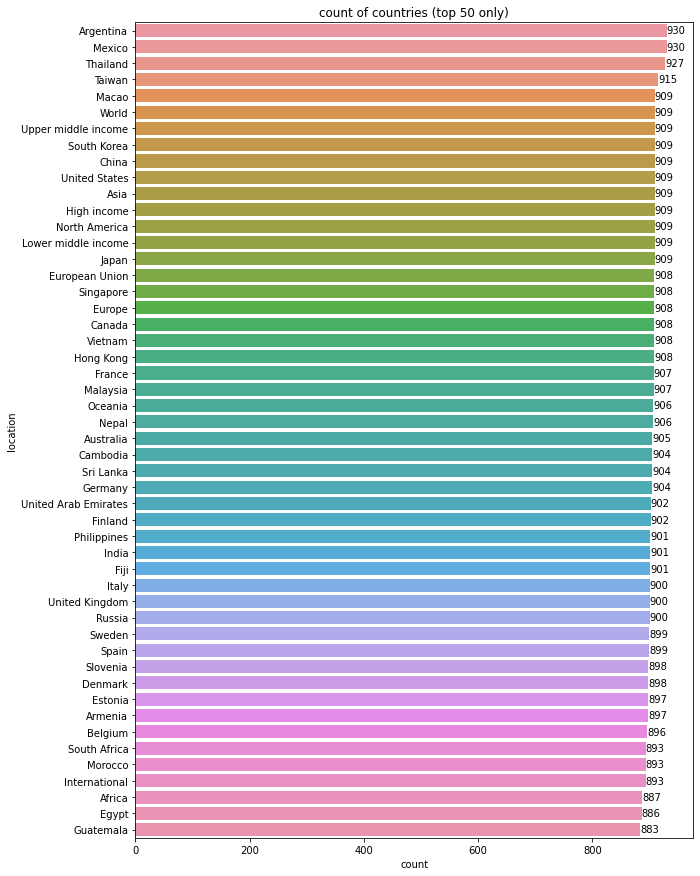

In [58]:
plt.figure(figsize = (10,15))
plt.title('count of countries (top 50 only)')
ax = sns.countplot(
    y='location',
    data=df,
    order=df['location'].value_counts()[0:50].index
)
ax.bar_label(ax.containers[0])
ax

In [87]:
# sns.barplot(x=df['location'], y=df['total_cases'].max(), hue = df['date'])


In [59]:
egy = df[df['location'] == 'Egypt']
print(egy.shape)
egy.head()

(886, 67)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
52446,EGY,Africa,Egypt,2020-02-14,1.0,1.0,NaN,NaN,NaN,NaN,0.009,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,109262178.0,97.999,25.3,5.159,2.891,10550.206,1.3,525.432,17.31,0.2,50.1,89.827,1.6,71.99,0.707,NaN,NaN,NaN,NaN
52447,EGY,Africa,Egypt,2020-02-15,1.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,109262178.0,97.999,25.3,5.159,2.891,10550.206,1.3,525.432,17.31,0.2,50.1,89.827,1.6,71.99,0.707,NaN,NaN,NaN,NaN
52448,EGY,Africa,Egypt,2020-02-16,1.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,109262178.0,97.999,25.3,5.159,2.891,10550.206,1.3,525.432,17.31,0.2,50.1,89.827,1.6,71.99,0.707,NaN,NaN,NaN,NaN
52449,EGY,Africa,Egypt,2020-02-17,1.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,109262178.0,97.999,25.3,5.159,2.891,10550.206,1.3,525.432,17.31,0.2,50.1,89.827,1.6,71.99,0.707,NaN,NaN,NaN,NaN
52450,EGY,Africa,Egypt,2020-02-18,1.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,109262178.0,97.999,25.3,5.159,2.891,10550.206,1.3,525.432,17.31,0.2,50.1,89.827,1.6,71.99,0.707,NaN,NaN,NaN,NaN


In [60]:
egy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886 entries, 52446 to 53331
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    886 non-null    object 
 1   continent                                   886 non-null    object 
 2   location                                    886 non-null    object 
 3   date                                        886 non-null    object 
 4   total_cases                                 886 non-null    float64
 5   new_cases                                   886 non-null    float64
 6   new_cases_smoothed                          881 non-null    float64
 7   total_deaths                                863 non-null    float64
 8   new_deaths                                  863 non-null    float64
 9   new_deaths_smoothed                         858 non-null    float64
 10  total_ca

In [61]:
egy = egy.dropna(axis=1, how='all')
print(egy.shape)
egy.head()

(886, 57)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,total_tests,total_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
52446,EGY,Africa,Egypt,2020-02-14,1.0,1.0,NaN,NaN,NaN,NaN,0.009,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,109262178.0,97.999,25.3,5.159,2.891,10550.206,1.3,525.432,17.31,0.2,50.1,89.827,1.6,71.99,0.707,NaN,NaN,NaN,NaN
52447,EGY,Africa,Egypt,2020-02-15,1.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,109262178.0,97.999,25.3,5.159,2.891,10550.206,1.3,525.432,17.31,0.2,50.1,89.827,1.6,71.99,0.707,NaN,NaN,NaN,NaN
52448,EGY,Africa,Egypt,2020-02-16,1.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,109262178.0,97.999,25.3,5.159,2.891,10550.206,1.3,525.432,17.31,0.2,50.1,89.827,1.6,71.99,0.707,NaN,NaN,NaN,NaN
52449,EGY,Africa,Egypt,2020-02-17,1.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,109262178.0,97.999,25.3,5.159,2.891,10550.206,1.3,525.432,17.31,0.2,50.1,89.827,1.6,71.99,0.707,NaN,NaN,NaN,NaN
52450,EGY,Africa,Egypt,2020-02-18,1.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,109262178.0,97.999,25.3,5.159,2.891,10550.206,1.3,525.432,17.31,0.2,50.1,89.827,1.6,71.99,0.707,NaN,NaN,NaN,NaN


In [62]:
print('first registered case(s): ', egy['date'].iloc[0], ' = ', egy['new_cases'].iloc[0],
    '\nlast registered case(s): ', egy['date'].iloc[-1], ' = ', egy['new_cases'].iloc[-1])
egy.describe()

first registered case(s):  2020-02-14  =  1.0 
last registered case(s):  2022-07-18  =  0.0


,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,total_tests,total_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,886.000000,886.000000,881.000000,863.000000,863.000000,858.000000,886.000000,886.000000,881.000000,863.000000,863.000000,858.000000,853.000000,6.000000e+00,6.000000,49.000000,49.000000,47.000000,37.000000,8.700000e+01,8.400000e+01,7.800000e+01,1.900000e+01,10.0000,521.000000,87.000000,84.000000,78.000000,19.000000,521.000000,521.000000,521.000000,879.000000,886.0,886.000,8.860000e+02,886.000,8.860000e+02,886.000,8.860000e+02,8.860000e+02,886.00,8.860000e+02,8.860000e+02,8.860000e+02,8.860000e+02,886.00,8.860000e+02,25.000000,25.000000,25.000000,25.000000
mean,241465.452596,581.992099,585.294316,13263.762457,28.679027,28.820368,2209.963791,5.326553,5.356763,121.393903,0.262489,0.263766,0.909941,7.016298e+06,67.297167,109588.306122,1.051184,0.091523,223.310811,3.405753e+07,1.983221e+07,1.317200e+07,2.686166e+06,215749.9000,173430.545106,31.170805,18.151071,12.056026,2.457895,1587.324376,93492.017274,0.085631,51.847691,109262178.0,97.999,2.530000e+01,5.159,2.891000e+00,10550.206,1.300000e+00,5.254320e+02,17.31,2.000000e-01,5.010000e+01,8.982700e+01,1.600000e+00,71.99,7.070000e-01,142577.200000,18.509200,27.103600,1304.909005
std,167182.040969,606.255111,515.441714,8227.904763,23.250429,21.652002,1530.099896,5.548621,4.717478,75.304248,0.212780,0.198177,0.397252,2.419862e+06,23.210292,90841.367211,0.871434,0.203912,195.647866,3.175138e+07,1.755152e+07,1.281360e+07,1.416773e+06,341337.1742,152783.732102,29.059222,16.064100,11.727204,1.296369,1398.297063,93978.310722,0.085965,16.498476,0.0,0.000,7.109441e-15,0.000,4.443400e-16,0.000,2.221700e-16,1.137510e-13,0.00,2.777125e-17,1.421888e-14,1.421888e-14,2.221700e-16,0.00,1.110850e-16,97307.235263,7.614254,20.765417,890.584803
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.009000,0.000000,0.000000,0.009000,0.000000,0.000000,-0.010000,5.997796e+06,57.528000,409.000000,0.004000,0.000000,1.100000,0.000000e+00,0.000000e+00,2.358520e+05,8.111710e+05,29244.0000,219.000000,0.000000,0.000000,0.220000,0.740000,2.000000,219.000000,0.000000,0.000000,109262178.0,97.999,2.530000e+01,5.159,2.891000e+00,10550.206,1.300000e+00,5.254320e+02,17.31,2.000000e-01,5.010000e+01,8.982700e+01,1.600000e+00,71.99,7.070000e-01,171.000000,0.160000,-0.560000,1.565043
25%,102284.250000,110.250000,131.286000,6034.500000,9.500000,11.143000,936.135750,1.009250,1.202000,55.229500,0.087000,0.102000,0.790000,6.003934e+06,57.587000,4809.000000,0.046000,0.002100,13.500000,4.513902e+06,3.566230e+06,1.091969e+06,1.620807e+06,32175.0000,30486.000000,4.135000,3.267500,1.002500,1.485000,279.000000,19255.000000,0.018000,43.520000,109262178.0,97.999,2.530000e+01,5.159,2.891000e+00,10550.206,1.300000e+00,5.254320e+02,17.31,2.000000e-01,5.010000e+01,8.982700e+01,1.600000e+00,71.99,7.070000e-01,73052.200000,18.380000,13.560000,668.595495
50%,229109.500000,493.000000,555.857000,14150.000000,24.000000,23.78

In [63]:
print('max numbers of registered cases in egypt: ', egy['new_cases'].max())
print('max numbers of registered deaths in egypt: ', egy['new_deaths'].max())
print('total number of registered tests in egypt: ', egy['total_tests'].max())

max numbers of registered cases in egypt:  5516.0
max numbers of registered deaths in egypt:  132.0
total number of registered tests in egypt:  11954884.0


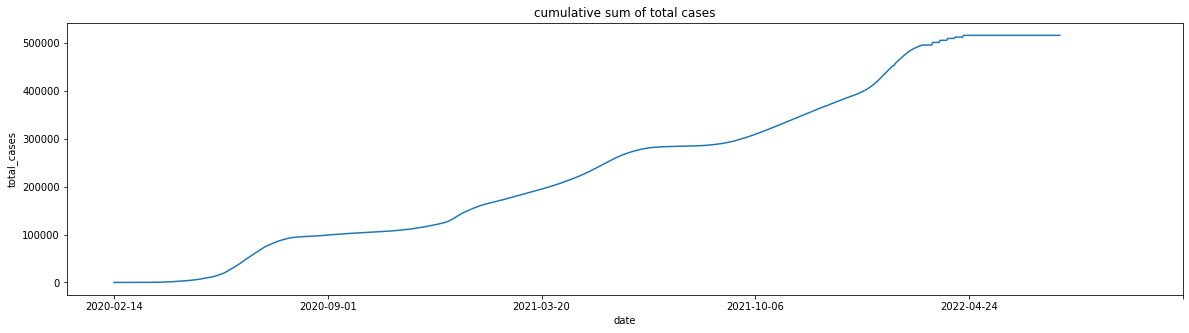

In [64]:
# cumulative sum of total cases
plt.figure(figsize = (20,5))
plt.title('cumulative sum of total cases')
sns.lineplot(x=egy['date'], y=egy['total_cases'])
my_xticks = ax.get_xticks()
plt.xticks(my_xticks, visible=True, rotation="horizontal")
plt.show()

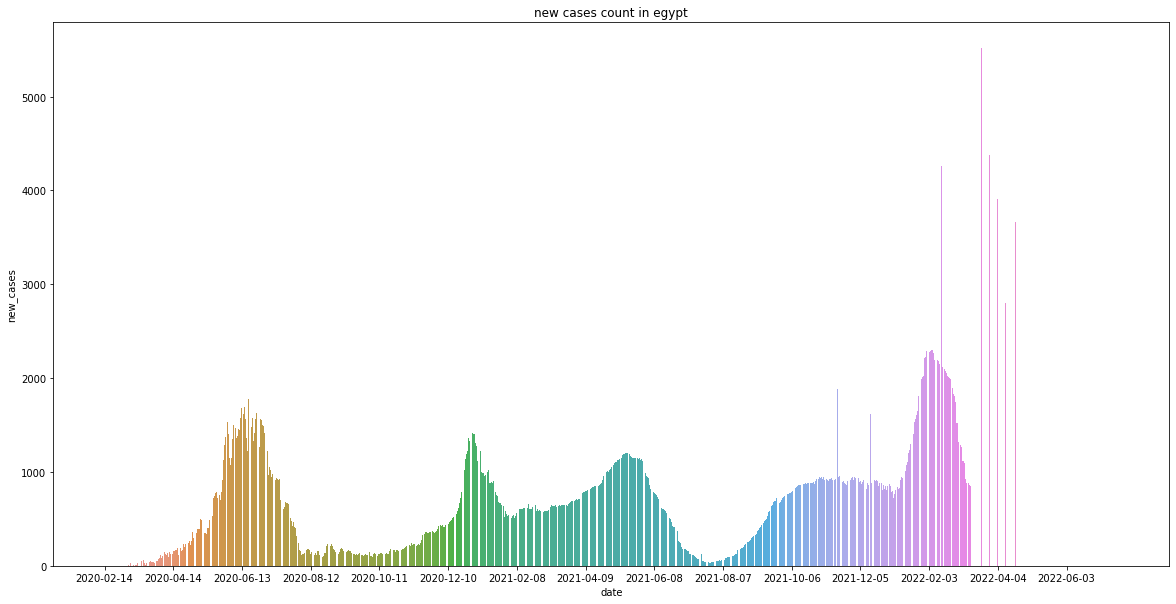

In [65]:
# barplot
plt.figure(figsize=(20,10))
plt.title('new cases count in egypt')
sns.barplot(x=egy['date'], y=egy['new_cases'])
plt.locator_params(axis='x', nbins=15)
plt.show()

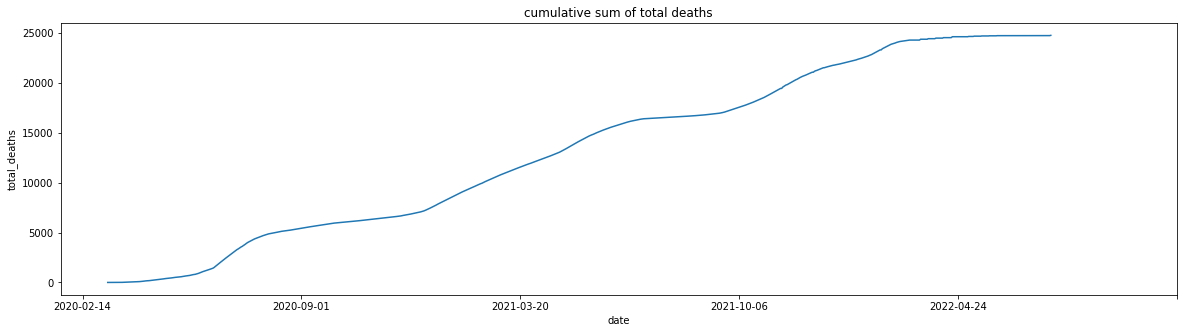

In [66]:
# cumulative sum of total deaths
plt.figure(figsize = (20,5))
plt.title('cumulative sum of total deaths')
sns.lineplot(x=egy['date'], y=egy['total_deaths'])
my_xticks = ax.get_xticks()
plt.xticks(my_xticks, visible=True, rotation="horizontal")
plt.show()

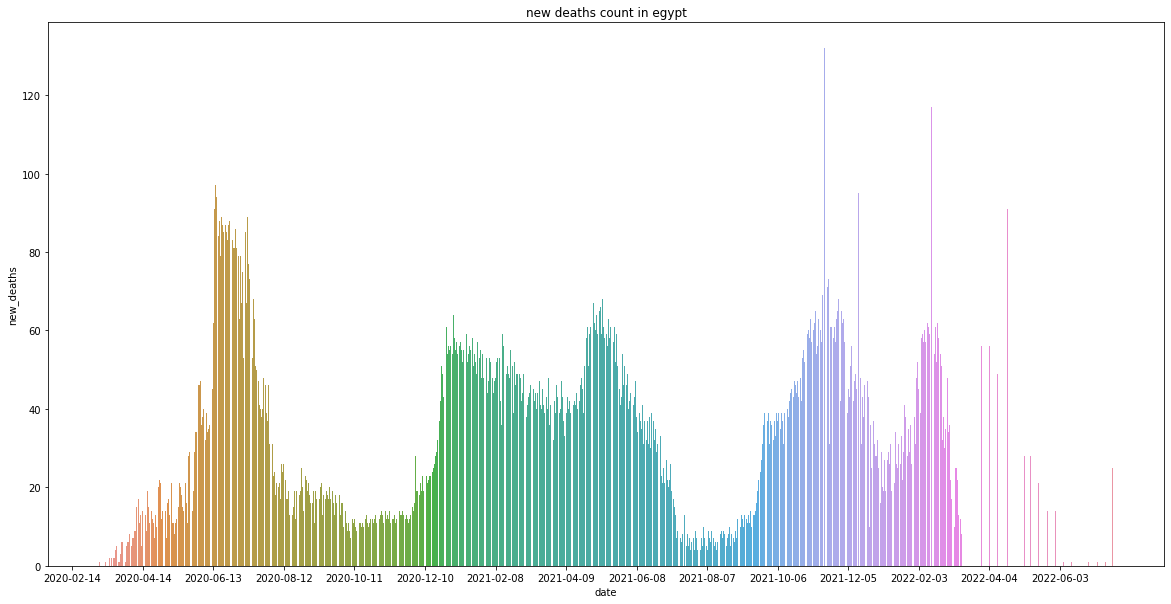

In [67]:
# barplot
plt.figure(figsize=(20,10))
plt.title('new deaths count in egypt')
sns.barplot(x=egy['date'], y=egy['new_deaths'])
plt.locator_params(axis='x', nbins=15)
plt.show()

In [72]:
egy.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'total_tests',
       'total_tests_per_thousand', 'new_tests_smoothed',
       'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case',
       'tests_units', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'total_boosters', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       'total_boosters_per_hundred', 'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'string

In [81]:
start = egy.columns.get_loc('stringency_index')
egy_sub = egy.iloc[:,start:-1]
print(egy_sub.shape)
egy_sub.head()

(886, 19)


,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality
52446,0.0,109262178.0,97.999,25.3,5.159,2.891,10550.206,1.3,525.432,17.31,0.2,50.1,89.827,1.6,71.99,0.707,NaN,NaN,NaN
52447,0.0,109262178.0,97.999,25.3,5.159,2.891,10550.206,1.3,525.432,17.31,0.2,50.1,89.827,1.6,71.99,0.707,NaN,NaN,NaN
52448,0.0,109262178.0,97.999,25.3,5.159,2.891,10550.206,1.3,525.432,17.31,0.2,50.1,89.827,1.6,71.99,0.707,NaN,NaN,NaN
52449,0.0,109262178.0,97.999,25.3,5.159,2.891,10550.206,1.3,525.432,17.31,0.2,50.1,89.827,1.6,71.99,0.707,NaN,NaN,NaN
52450,0.0,109262178.0,97.999,25.3,5.159,2.891,10550.206,1.3,525.432,17.31,0.2,50.1,89.827,1.6,71.99,0.707,NaN,NaN,NaN


In [95]:
# egy_sub.columns[1]
egy_sub.iloc[:,1].unique()

array([1.09262178e+08])

In [96]:
# unique values in each column
for i in range(egy_sub.shape[1]):
    print(egy_sub.columns[i], egy_sub.iloc[:,i].unique())

stringency_index [ 0.   11.11 18.52 29.63 40.74 51.85 84.26 87.96 71.3  60.19 62.96 65.74
 54.63 50.93 33.33 43.52 37.96   nan]
population [1.09262178e+08]
population_density [97.999]
median_age [25.3]
aged_65_older [5.159]
aged_70_older [2.891]
gdp_per_capita [10550.206]
extreme_poverty [1.3]
cardiovasc_death_rate [525.432]
diabetes_prevalence [17.31]
female_smokers [0.2]
male_smokers [50.1]
handwashing_facilities [89.827]
hospital_beds_per_thousand [1.6]
life_expectancy [71.99]
human_development_index [0.707]
excess_mortality_cumulative_absolute [         nan 1.710000e+02 3.124800e+03 2.889400e+03 1.611240e+04
 5.202900e+04 6.608040e+04 7.305220e+04 7.989280e+04 8.295640e+04
 8.981660e+04 1.055802e+05 1.165607e+05 1.226380e+05 1.370777e+05
 1.619522e+05 1.919001e+05 2.033436e+05 2.112019e+05 2.179186e+05
 2.320061e+05 2.542906e+05 2.706747e+05 2.773452e+05 2.878986e+05
 3.079168e+05]
excess_mortality_cumulative [  nan  0.16  2.04  1.48  6.75 18.46 20.1  19.31 18.98 17.89 17.7  18.83


In [102]:
# drop columns with 1 unique value
for i in range(egy_sub.shape[1]):
    ulen = len(egy_sub.iloc[:,i].unique())
    print(ulen)
# type(ulen)
    # if ulen == 1:
        # egy_sub.drop(egy_sub.columns[i], axis=1, inplace=True)
# print(egy_sub.shape)
# egy_sub.head()

18
1
1
1
26
25
26
